In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# pip uninstall scikit-learn
!pip install scikit-learn==0.21.2

     |████████████████████████████████| 6.7MB 2.6MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
file_name = '/content/gdrive/My Drive/capstone/full database/Results_20160630_20200630.csv'
df = pd.read_csv(file_name)

In [ ]:
df = df[df.HOLDDATE == '2018-09-30 00:00:00']

## EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1305276 entries, 11 to 21380412
Data columns (total 16 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   INSTRID         1305276 non-null  int64  
 1   COMNAME         1305270 non-null  object 
 2   INSTRTYPE       1305270 non-null  object 
 3   LGCYINVESTORID  1305276 non-null  int64  
 4   FULLNAME        1305276 non-null  object 
 5   HOLDDATE        1305276 non-null  object 
 6   OWNERSHIPID     1305276 non-null  int64  
 7   EFFECTFROMDATE  1305276 non-null  object 
 8   EFFECTTODATE    1305276 non-null  object 
 9   FILINGTYPECODE  1305276 non-null  int64  
 10  DESC_           1305276 non-null  object 
 11  PCTSHOUTHLD     1305276 non-null  float64
 12  SHSHLD          1305276 non-null  int64  
 13  SHSHLDVAL       1305276 non-null  float64
 14  EQASSETHOLDVAL  1305276 non-null  float64
 15  PCTPORTFOLIO    1305276 non-null  float64
dtypes: float64(4), int64(5), object(7)

### missing value

In [ ]:
df[df.COMNAME.isna()]

,INSTRID,COMNAME,INSTRTYPE,LGCYINVESTORID,FULLNAME,HOLDDATE,OWNERSHIPID,EFFECTFROMDATE,EFFECTTODATE,FILINGTYPECODE,DESC_,PCTSHOUTHLD,SHSHLD,SHSHLDVAL,EQASSETHOLDVAL,PCTPORTFOLIO
17312002,18040214097,NaN,NaN,2004303,"RBC Wealth Management, International",2018-09-30 00:00:00,48478699089,2018-09-01 00:00:00,2018-11-30 00:00:00,1,13F,0.0288,46,5304.26,1.702755e+10,3.115105e-07
17312015,18040214097,NaN,NaN,2002643,RBC Capital Markets Wealth Management,2018-09-30 00:00:00,48476963984,2018-09-01 00:00:00,2018-11-30 00:00:00,1,13F,9.4775,15164,1748560.84,4.892526e+10,3.573943e-05
17314086,18040214097,NaN,NaN,2003020,BofA Global Research (US),2018-09-30 00:00:00,48477596769,2018-09-01 00:00:00,2018-11-30 00:00:00,1,13F,1.2037,1926,222087.06,3.479899e+11,6.381998e-07
17314093,18040214097,NaN,NaN,9941555,Jackson Financial Management,2018-09-30 00:00:00,48479378469,2018-09-01 00:00:00,2018-11-30 00:00:00,1,13F,24.3375,38940,4490171.40,1.258941e+08,3.566624e-02
17314100,18040214097,NaN,NaN,4902270,Managed Account Advisors LLC,2018-09-30 00:00:00,48478693902,2018-09-01 00:00:00,2018-11-30 00:00:00,1,13F,0.2631,421,48545.51,2.442668e+11,1.987397e-07
17314105,18040214097,NaN,NaN,3313712,"Susquehanna International Group, LLP",2018-09-30 00:00:00,48481823841,2018-09-01 00:00:00,2018-11-30 00:00:00,1,13F,1.3500,2160,249069.60,2.601267e+10,9.574935e-06


In [ ]:
df[df.INSTRID == 18040214097]

,INSTRID,COMNAME,INSTRTYPE,LGCYINVESTORID,FULLNAME,HOLDDATE,OWNERSHIPID,EFFECTFROMDATE,EFFECTTODATE,FILINGTYPECODE,DESC_,PCTSHOUTHLD,SHSHLD,SHSHLDVAL,EQASSETHOLDVAL,PCTPORTFOLIO
17312002,18040214097,NaN,NaN,2004303,"RBC Wealth Management, International",2018-09-30 00:00:00,48478699089,2018-09-01 00:00:00,2018-11-30 00:00:00,1,13F,0.0288,46,5304.26,1.702755e+10,3.115105e-07
17312015,18040214097,NaN,NaN,2002643,RBC Capital Markets Wealth Management,2018-09-30 00:00:00,48476963984,2018-09-01 00:00:00,2018-11-30 00:00:00,1,13F,9.4775,15164,1748560.84,4.892526e+10,3.573943e-05
17314086,18040214097,NaN,NaN,2003020,BofA Global Research (US),2018-09-30 00:00:00,48477596769,2018-09-01 00:00:00,2018-11-30 00:00:00,1,13F,1.2037,1926,222087.06,3.479899e+11,6.381998e-07
17314093,18040214097,NaN,NaN,9941555,Jackson Financial Management,2018-09-30 00:00:00,48479378469,2018-09-01 00:00:00,2018-11-30 00:00:00,1,13F,24.3375,38940,4490171.40,1.258941e+08,3.566624e-02
17314100,18040214097,NaN,NaN,4902270,Managed Account Advisors LLC,2018-09-30 00:00:00,48478693902,2018-09-01 00:00:00,2018-11-30 00:00:00,1,13F,0.2631,421,48545.51,2.442668e+11,1.987397e-07
17314105,18040214097,NaN,NaN,3313712,"Susquehanna International Group, LLP",2018-09-30 00:00:00,48481823841,2018-09-01 00:00:00,2018-11-30 00:00:00,1,13F,1.3500,2160,249069.60,2.601267e+10,9.574935e-06


### instrtype

In [ ]:
df.INSTRTYPE.value_counts()

EQUITY            1305222
OPEN FUND UNIT         46
DEBT                    1
DERIVATIVE              1
Name: INSTRTYPE, dtype: int64

## Create feature

In [ ]:
data = pd.pivot_table(df,index = ['LGCYINVESTORID'], columns = ['INSTRID'],values=['PCTPORTFOLIO']).fillna(0)
X = np.array(data)

(array([4.500e+01, 3.700e+01, 4.300e+01, 3.900e+01, 3.500e+01, 4.300e+01,
        3.400e+01, 4.300e+01, 5.300e+01, 4.800e+01, 4.300e+01, 5.900e+01,
        7.300e+01, 6.500e+01, 1.010e+02, 1.160e+02, 1.980e+02, 5.920e+02,
        3.114e+03, 2.000e+00]),
 array([0.00200338, 0.05695232, 0.11190126, 0.1668502 , 0.22179915,
        0.27674809, 0.33169703, 0.38664597, 0.44159491, 0.49654385,
        0.5514928 , 0.60644174, 0.66139068, 0.71633962, 0.77128856,
        0.8262375 , 0.88118645, 0.93613539, 0.99108433, 1.04603327,
        1.10098221]),
 <a list of 20 Patch objects>)

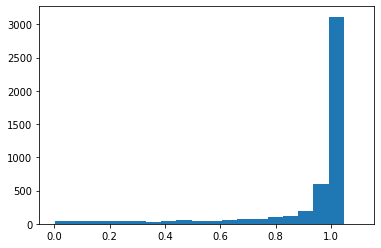

In [ ]:
plt.hist(X.sum(axis = 1),bins=20)

In [ ]:
X.shape

(4783, 10863)

## Spectural Clustering

In [ ]:
from sklearn import metrics
from sklearn.cluster import SpectralClustering

def InternalEvaluation(data, clusters):
    scores = {}
    """
    The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. 
    Scores around zero indicate overlapping clusters.
    The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.
    """
    scores['_silhouette_score'] =metrics.silhouette_score(data,clusters ,metric='euclidean')
    """
    The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.
    The score is fast to compute
    """
    scores['_calinski_harabaz_score'] = metrics.calinski_harabasz_score(data,clusters)
    """
    Zero is the lowest possible score. Values closer to zero indicate a better partition.
    The Davies-Boulding index is generally higher for convex clusters than other concepts of clusters, 
    such as density based clusters like those obtained from DBSCAN.
    """
    scores['_davies_bouldin_score'] = metrics.davies_bouldin_score(data,clusters)
    return scores

In [ ]:
def draw_scores(scores, start_k=2):
  score_type = list(scores[0].keys())
  n_type = len(score_type)
  plt.figure(figsize=(8,4))
  for i in range(n_type):
    sc_type = score_type[i]
    score = [sc[sc_type] for sc in scores]
    plt.subplot(1, n_type, i+1)
    plt.plot(range(start_k,len(score) + start_k ), score)
    plt.title(' '.join(sc_type.split('_')).title())
    plt.xlabel('k')
  plt.suptitle('Metrics for Clustering')
    

### 1. default: best k=3

In [ ]:
scores = []
for k in range(2, 10):
  spec = SpectralClustering(n_clusters=k).fit(X)
  labels = spec.labels_
  score = InternalEvaluation(X, spec.labels_)
  scores.append(score)


In [ ]:
scores

[{'_calinski_harabaz_score': 132.20709052510637,
  '_davies_bouldin_score': 0.6920825365357186,
  '_silhouette_score': 0.57800560732365},
 {'_calinski_harabaz_score': 102.18645416439207,
  '_davies_bouldin_score': 1.5362013725333525,
  '_silhouette_score': 0.3129784163761604},
 {'_calinski_harabaz_score': 86.65002123761286,
  '_davies_bouldin_score': 3.9863923468368396,
  '_silhouette_score': -0.008774241772716384},
 {'_calinski_harabaz_score': 79.18628535667608,
  '_davies_bouldin_score': 3.5064141104824693,
  '_silhouette_score': -0.014829510922337771},
 {'_calinski_harabaz_score': 71.99485545743282,
  '_davies_bouldin_score': 2.9419547423280594,
  '_silhouette_score': -0.020763956094600283},
 {'_calinski_harabaz_score': 68.33472005734893,
  '_davies_bouldin_score': 2.7642778267005603,
  '_silhouette_score': -0.01978352856565068},
 {'_calinski_harabaz_score': 62.89085709530397,
  '_davies_bouldin_score': 2.6552713447077743,
  '_silhouette_score': -0.023921306634868578},
 {'_calinski_

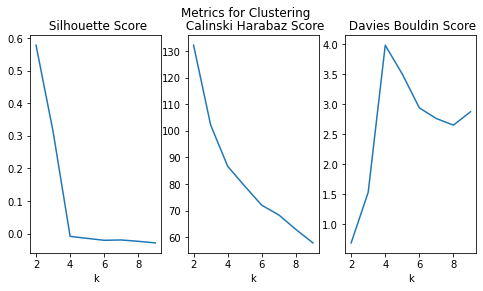

In [ ]:
draw_scores(scores)

In [ ]:
spec = SpectralClustering(n_clusters=2).fit(X)

In [ ]:

import scipy
from scipy.sparse import csgraph
# from scipy.sparse.linalg import eigsh
from numpy import linalg as LA
def eigenDecomposition(A, plot = True, topK = 5):
    """
    :param A: Affinity matrix
    :param plot: plots the sorted eigen values for visual inspection
    :return A tuple containing:
    - the optimal number of clusters by eigengap heuristic
    - all eigen values
    - all eigen vectors
    
    This method performs the eigen decomposition on a given affinity matrix,
    following the steps recommended in the paper:
    1. Construct the normalized affinity matrix: L = D−1/2ADˆ −1/2.
    2. Find the eigenvalues and their associated eigen vectors
    3. Identify the maximum gap which corresponds to the number of clusters
    by eigengap heuristic
    
    References:
    https://papers.nips.cc/paper/2619-self-tuning-spectral-clustering.pdf
    http://www.kyb.mpg.de/fileadmin/user_upload/files/publications/attachments/Luxburg07_tutorial_4488%5b0%5d.pdf
    """
    L = csgraph.laplacian(A, normed=True)
    n_components = A.shape[0]
    
    # LM parameter : Eigenvalues with largest magnitude (eigs, eigsh), that is, largest eigenvalues in 
    # the euclidean norm of complex numbers.
#     eigenvalues, eigenvectors = eigsh(L, k=n_components, which="LM", sigma=1.0, maxiter=5000)
    eigenvalues, eigenvectors = LA.eig(L)
    
    if plot:
        plt.title('Largest eigen values of input matrix')
        plt.scatter(np.arange(len(eigenvalues)), eigenvalues)
        plt.grid()
        
    # Identify the optimal number of clusters as the index corresponding
    # to the larger gap between eigen values
    index_largest_gap = np.argsort(np.diff(eigenvalues))[::-1][:topK]
    nb_clusters = index_largest_gap + 1
        
    return nb_clusters, eigenvalues, eigenvectors

In [ ]:
# best k = 3
spec = SpectralClustering(n_clusters=3).fit(X)
labels = spec.labels_
score = InternalEvaluation(X, spec.labels_)
np.bincount(labels)

array([4683,   20,   80])

(array([ 1,  2,  3, 40, 44]),
 array([3.33517785e-17, 9.93082335e-01, 9.96814297e-01, ...,
        1.00022423e+00, 1.00022423e+00, 1.00022423e+00]),
 array([[ 0.0148117 , -0.00368839, -0.00523308, ...,  0.00170542,
          0.00345772, -0.00014633],
        [ 0.01486972, -0.00376305, -0.00490817, ...,  0.00412919,
          0.00207159,  0.01587898],
        [ 0.01483144, -0.00391105, -0.00652307, ..., -0.00043082,
          0.00010452, -0.00658138],
        ...,
        [ 0.01484141, -0.00338816, -0.00197045, ..., -0.00101699,
          0.00010076,  0.00412984],
        [ 0.01470946,  0.00460901,  0.0111498 , ...,  0.00044227,
          0.00121162, -0.00097367],
        [ 0.01442161, -0.00226716,  0.00366863, ...,  0.00123248,
         -0.00214518, -0.00418141]]))

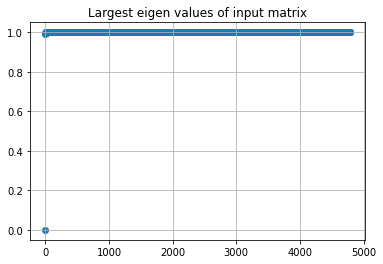

In [ ]:
eigenDecomposition(spec.affinity_matrix_, plot = True, topK = 5)

In [ ]:
score

{'_calinski_harabaz_score': 102.18645416439207,
 '_davies_bouldin_score': 1.5362013725333525,
 '_silhouette_score': 0.3129784163761604}

### 2. use nearest neighbour affinity matrix

In [ ]:
scores = []
for k in range(2, 10):
  spec = SpectralClustering(n_clusters=k, affinity='nearest_neighbors').fit(X)
  labels = spec.labels_
  score = InternalEvaluation(X, spec.labels_)
  scores.append(score)
  print('finished for k = ' + k)

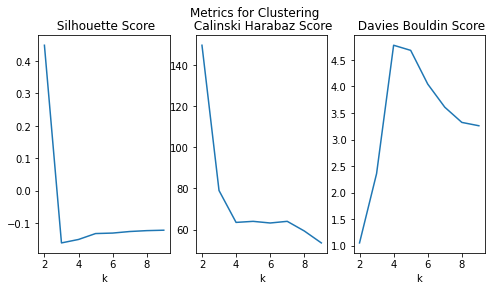

In [ ]:
draw_scores(scores)

In [ ]:
scores

[{'_calinski_harabaz_score': 149.5939783428355,
  '_davies_bouldin_score': 1.053953240079089,
  '_silhouette_score': 0.4483040789475368},
 {'_calinski_harabaz_score': 78.97347881639634,
  '_davies_bouldin_score': 2.3580061539787494,
  '_silhouette_score': -0.1602945263221928},
 {'_calinski_harabaz_score': 63.47488258982095,
  '_davies_bouldin_score': 4.776056637577438,
  '_silhouette_score': -0.14968107908593314},
 {'_calinski_harabaz_score': 63.98774861853414,
  '_davies_bouldin_score': 4.679725744782844,
  '_silhouette_score': -0.13146484291827554},
 {'_calinski_harabaz_score': 63.18712060764225,
  '_davies_bouldin_score': 4.045065667392747,
  '_silhouette_score': -0.12999116516373363},
 {'_calinski_harabaz_score': 63.99543188310441,
  '_davies_bouldin_score': 3.609572808844183,
  '_silhouette_score': -0.12520541467475485},
 {'_calinski_harabaz_score': 59.31118432444346,
  '_davies_bouldin_score': 3.3231781874419495,
  '_silhouette_score': -0.12247838302761183},
 {'_calinski_harabaz_

### 3. self-defined affinity matrix

In [ ]:
def top10overlapAffinity(X):
  aff_matrix = np.zeros((X.shape[0],X.shape[0]),dtype=int)
  top10 = np.argsort(X,axis=1)[:,-10:]
  print(top10.shape)
  for i in range(X.shape[0]):
    for j in range(i + 1, X.shape[0]):
      aff_matrix[i][j] = len(set(top10[i]) & set(top10[j]))
      aff_matrix[j][i] = len(set(top10[i]) & set(top10[j]))
  return aff_matrix

aff_matrix = top10overlapAffinity(X)



finish clustering for k =  2
[ 365 4418]
{'_silhouette_score': 0.4900338673402838, '_calinski_harabaz_score': 12.053677387707618, '_davies_bouldin_score': 14.497805734287068}
finish clustering for k =  3
[ 421 4324   38]
{'_silhouette_score': -0.0015331263563580103, '_calinski_harabaz_score': 8.243394145898803, '_davies_bouldin_score': 7.680579462698681}
finish clustering for k =  4
[4262   31   19  471]
{'_silhouette_score': 0.0026169507308123887, '_calinski_harabaz_score': 6.338048267268292, '_davies_bouldin_score': 7.239809784701448}
finish clustering for k =  5
[3461   31  495   19  777]
{'_silhouette_score': 0.008638812824984337, '_calinski_harabaz_score': 14.775469094005993, '_davies_bouldin_score': 6.984276794642918}
finish clustering for k =  6
[ 494    2   33 3452   25  777]
{'_silhouette_score': -0.291049084427292, '_calinski_harabaz_score': 11.930075838103944, '_davies_bouldin_score': 6.461383967365085}
finish clustering for k =  7
[4183    2   31   61  402   19   85]
{'_sil

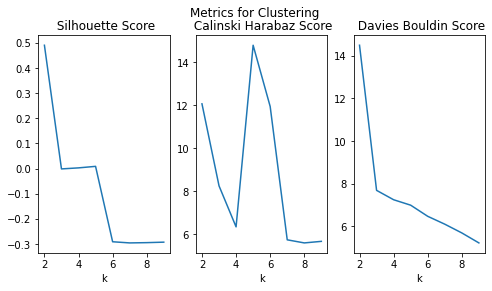

In [ ]:
scores = []
for k in range(2,10):
  spec = SpectralClustering(n_clusters=k, affinity = 'precomputed').fit(aff_matrix)
  labels = spec.labels_
  score = InternalEvaluation(X, labels)
  scores.append(score)
  print('finish clustering for k = ', k)
  print(np.bincount(labels))
  print(score)
draw_scores(scores)

In [ ]:
spec.affinity_matrix_.todense()

matrix([[1. , 0. , 0.5, ..., 0. , 0. , 0. ],
        [0. , 0. , 0.5, ..., 0. , 0. , 0.5],
        [0.5, 0.5, 1. , ..., 0. , 0. , 1. ],
        ...,
        [0. , 0. , 0. , ..., 1. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 1. , 0. ],
        [0. , 0.5, 1. , ..., 0. , 0. , 1. ]])

### 3. PCA first

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.80).fit(X)


In [ ]:
X_pca = PCA(n_components=3).fit_transform(X)
scores = []
for k in range(2, 10):
  spec = SpectralClustering(n_clusters=k).fit(X_pca)
  labels = spec.labels_
  score = InternalEvaluation(X_pca, spec.labels_)
  scores.append(score)
draw_scores(scores)

In [ ]:
X_pca.shape

(4783, 401)

Optimal number of clusters [ 1 15 20 22  3]


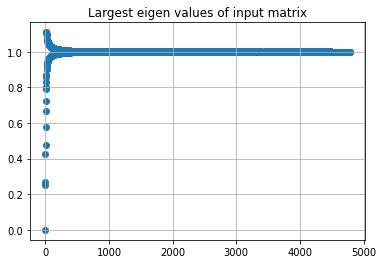

In [ ]:
from sklearn.decomposition import PCA

for n_com in range(2, 20):
  X_pca = PCA(n_components=n_com).fit_transform(X)
  score = []
  for k in range(2, 10):
    spec = SpectralClustering(n_clusters=k).fit(X_pca)
    labels = spec.labels_
    score = InternalEvaluation(X_pca, spec.labels_)
    scores_optimal.append(score)
  print("n_component for PCA", n_com)
  draw_score(scores)

Optimal number of clusters [ 1  2  3  4 13]


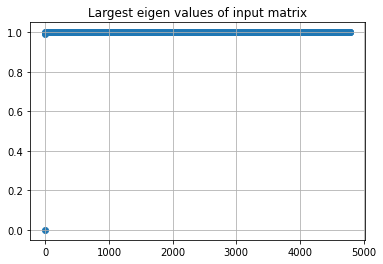

In [ ]:
from sklearn.decomposition import PCA

X_pca = PCA(n_components=2).fit_transform(X)

affinity_matrix = SpectralClustering(n_clusters=2).fit(X_pca).affinity_matrix_
k, _,  _ = eigenDecomposition(affinity_matrix)
print(f'Optimal number of clusters {k}')

### 4. Sparse PCA first

In [ ]:
from sklearn.decomposition import SparsePCA

sparse_pca = SparsePCA(n_components=4).fit(X)
X_sparse_pca = sparse_pca.transform(X)

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


In [ ]:
def getInstrName(col_index):
  instruId = data['PCTPORTFOLIO'].columns[col_index]
  name = df[df.INSTRID == instruId].COMNAME.iloc[0]
  return name

def getInvName(row_index):
  invId = data.index[row_index]
  name = df[df.LGCYINVESTORID == invId].FULLNAME.iloc[0]
  return name

In [ ]:
for i in np.nonzero(sparse_pca.components_)[1]:
  print(getInstrName(i))

SPDR S&P 500 ETF Trust
iShares Core S&P 500 ETF
Apple Ord Shs
Vanguard Total Stock Market Index Fund;ETF


In [ ]:
np.nonzero(sparse_pca.components_)

(array([0, 1, 2, 3]), array([4763, 1346, 4187,  711]))

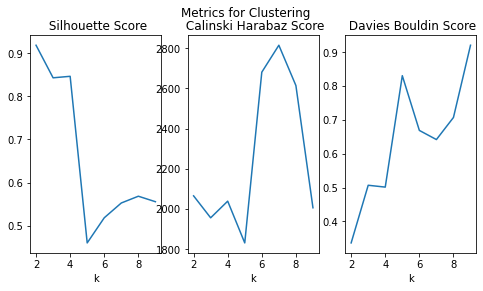

In [ ]:
scores = []
for k in range(2, 10):
  spec = SpectralClustering(n_clusters=k).fit(X_sparse_pca)
  labels = spec.labels_
  score = InternalEvaluation(X_sparse_pca, spec.labels_)
  scores.append(score)
draw_scores(scores)

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


finish clustering for k =  2
[4639  144]
{'_silhouette_score': 0.8217265946668683, '_calinski_harabaz_score': 1640.8202727078742, '_davies_bouldin_score': 1.158387166555947}
finish clustering for k =  3
[4654   73   56]
{'_silhouette_score': 0.8303179875210749, '_calinski_harabaz_score': 2084.131071849016, '_davies_bouldin_score': 0.6177126209410745}
finish clustering for k =  4
[3673  981   56   73]
{'_silhouette_score': 0.5912190424867171, '_calinski_harabaz_score': 2662.268011904768, '_davies_bouldin_score': 0.7029139068437956}
finish clustering for k =  5
[ 773 3139  742   73   56]
{'_silhouette_score': 0.4997609201845723, '_calinski_harabaz_score': 2188.312529870691, '_davies_bouldin_score': 1.0641067378071696}
finish clustering for k =  6
[3116  766  390  382   56   73]
{'_silhouette_score': 0.4645377197697057, '_calinski_harabaz_score': 1791.4204201120203, '_davies_bouldin_score': 1.0608158824964755}
finish clustering for k =  7
[3119  381    1   56  763   73  390]
{'_silhouette

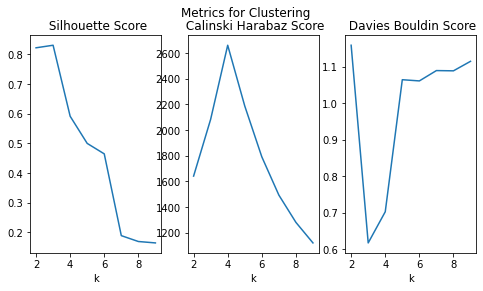

In [ ]:
from sklearn.decomposition import SparsePCA

sparse_pca = SparsePCA(n_components=3).fit(X)
X_sparse_pca = sparse_pca.transform(X)

scores = []
for k in range(2, 10):
  spec = SpectralClustering(n_clusters=k).fit(X_sparse_pca)
  labels = spec.labels_
  score = InternalEvaluation(X_sparse_pca, spec.labels_)
  scores.append(score)
  print('finish clustering for k = ', k)
  print(np.bincount(labels))
  print(score)
draw_scores(scores)

In [ ]:
for i in np.nonzero(sparse_pca.components_)[1]:
  print(getInstrName(i))

SPDR S&P 500 ETF Trust
Apple Ord Shs
iShares Core S&P 500 ETF


finish clustering for k =  2
[2909 1874]
{'_silhouette_score': 0.3857967520555982, '_calinski_harabaz_score': 380.72347898778145, '_davies_bouldin_score': 1.605985859917771}
finish clustering for k =  3
[2692 1548  543]
{'_silhouette_score': 0.32489308758134183, '_calinski_harabaz_score': 626.8664458085199, '_davies_bouldin_score': 1.5584874182203003}
finish clustering for k =  4
[1116 2670  469  528]
{'_silhouette_score': 0.33619091701548637, '_calinski_harabaz_score': 586.4376441114653, '_davies_bouldin_score': 1.4900416560000806}
finish clustering for k =  5
[2702  317  478  534  752]
{'_silhouette_score': 0.4193916959661287, '_calinski_harabaz_score': 504.18315026124867, '_davies_bouldin_score': 1.3482444156311089}
finish clustering for k =  6
[2569  594  301  406  459  454]
{'_silhouette_score': 0.4142113861423985, '_calinski_harabaz_score': 507.2684360635581, '_davies_bouldin_score': 1.3102259865180437}
finish clustering for k =  7
[ 400 2566  349  434  313  432  289]
{'_silhouet

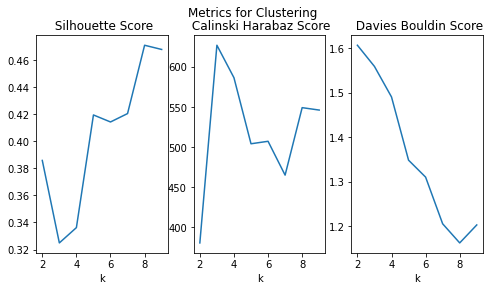

In [ ]:
# sparse_pca = SparsePCA(n_components=3).fit(X)
# X_sparse_pca = sparse_pca.transform(X)

scores = []
for k in range(2, 10):
  spec = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', n_neighbors= 400).fit(X_sparse_pca)
  labels = spec.labels_
  score = InternalEvaluation(X_sparse_pca, spec.labels_)
  scores.append(score)
  print('finish clustering for k = ', k)
  print(np.bincount(labels))
  print(score)
draw_scores(scores)

In [ ]:
# Best k = 4
spec = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', n_neighbors= 400).fit(X_sparse_pca)
labels = spec.labels_

In [ ]:
# company name for each cluster
cluster_result = pd.DataFrame({'labels': labels, 'INVESTORID': data.index})
inv_name = df.drop_duplicates(subset = 'LGCYINVESTORID')[['LGCYINVESTORID', 'FULLNAME','EQASSETHOLDVAL']]
cluster_result = pd.merge(cluster_result,inv_name, left_on = 'INVESTORID', right_on='LGCYINVESTORID')

In [ ]:
for i in range(max(cluster_result.labels)+1):
  print(cluster_result[cluster_result.labels == i].sort_values(by = 'EQASSETHOLDVAL',ascending=False)['FULLNAME'].head(10))

672                        The Vanguard Group, Inc.
534     BlackRock Institutional Trust Company, N.A.
491               State Street Global Advisors (US)
305      Fidelity Management & Research Company LLC
933        Norges Bank Investment Management (NBIM)
1792               Geode Capital Management, L.L.C.
42                       JP Morgan Asset Management
275                                      Nuveen LLC
417                       BofA Global Research (US)
614       BlackRock Investment Management (UK) Ltd.
Name: FULLNAME, dtype: object
294                              Dodge & Cox
599                    Baillie Gifford & Co.
453              PRIMECAP Management Company
948               Temasek Holdings Pte. Ltd.
1099            Renaissance Technologies LLC
983     Artisan Partners Limited Partnership
995                          Boston Partners
442                               PIMCO (US)
627         Daiwa Asset Management Co., Ltd.
612         M & G Investment Management Ltd.


In [ ]:
cluster_result[cluster_result.labels == 1].sort_values(by = 'EQASSETHOLDVAL',ascending=False)[].head(10)

,labels,INVESTORID,LGCYINVESTORID,FULLNAME,EQASSETHOLDVAL
294,1,2002659,2002659,Dodge & Cox,1.829425e+11
599,1,2003751,2003751,Baillie Gifford & Co.,1.763340e+11
453,1,2003132,2003132,PRIMECAP Management Company,1.505200e+11
948,1,2006130,2006130,Temasek Holdings Pte. Ltd.,1.244961e+11
1099,1,2007217,2007217,Renaissance Technologies LLC,9.768455e+10
983,1,2006474,2006474,Artisan Partners Limited Partnership,9.238393e+10
995,1,2006623,2006623,Boston Partners,9.034172e+10
442,1,2003101,2003101,PIMCO (US),8.678696e+10
627,1,2003905,2003905,"Daiwa Asset Management Co., Ltd.",8.460481e+10
612,1,2003811,2003811,M & G Investment Management Ltd.,8.322903e+10


In [ ]:
cluster_result[cluster_result.labels == 2].sort_values(by = 'EQASSETHOLDVAL',ascending=False)

,labels,INVESTORID,LGCYINVESTORID,FULLNAME,EQASSETHOLDVAL
49,2,2002019,2002019,Berkshire Hathaway Inc.,2.213258e+11
1848,2,2655110,2655110,Invesco Capital Management LLC,1.619110e+11
2939,2,5505145,5505145,BlackRock Asset Management Ireland Limited,1.088215e+11
796,2,2004635,2004635,Schweizerische Nationalbank,9.789906e+10
48,2,2002015,2002015,California State Teachers Retirement System,5.310888e+10
...,...,...,...,...,...
2182,2,3657538,3657538,First Western Capital Management Company,2.245011e+07
1495,2,2479376,2479376,"CAZ Investments, L.P.",2.192884e+07
4715,2,9998101,9998101,Miller-Green Financial Services.Inc,2.130727e+07
1764,2,2614227,2614227,"R.G. Niederhoffer Capital Management, Inc.",1.685702e+07


In [ ]:
cluster_result[cluster_result.labels == 1].sort_values(by = 'EQASSETHOLDVAL',ascending=False)

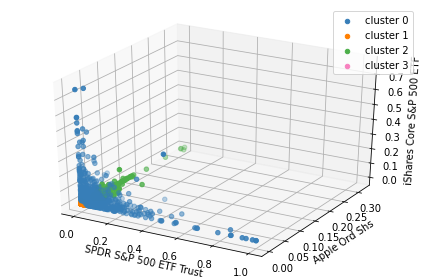

In [ ]:
r# plot the result


from itertools import cycle, islice
from matplotlib import rcParams
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                      '#f781bf', '#a65628', '#984ea3',
                                      '#999999', '#e41a1c', '#dede00']),
                              int(max(labels) + 1))))

fig = plt.figure()
ax = plt.axes(projection='3d')
components = np.nonzero(sparse_pca.components_)[1]
for i in range(1,max(labels) + 1):
  index = (labels == i)
  ax.scatter3D(X[index,components[0]],X[index,components[1]], X[index,components[2]],color=colors[i],label= 'cluster %i' %i )

x_name = getInstrName(components[0])
y_name = getInstrName(components[1])
z_name = getInstrName(components[2])
ax.set_xlabel(x_name,labelpad=2)
ax.set_ylabel(y_name,labelpad=2)
ax.set_zlabel(z_name,labelpad=2)
ax.legend()
# rcParams['axes.labelpad'] = 10
plt.tight_layout()

In [ ]:
np.bincount(labels)

array([1451, 2027,  641,  664])

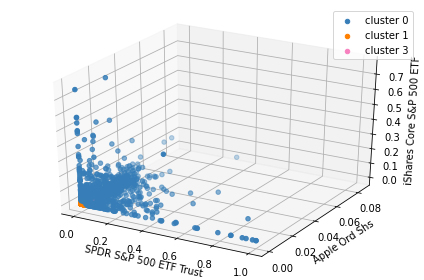

In [ ]:
from itertools import cycle, islice
from matplotlib import rcParams
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                      '#f781bf', '#a65628', '#984ea3',
                                      '#999999', '#e41a1c', '#dede00']),
                              int(max(labels) + 1))))

fig = plt.figure()
ax = plt.axes(projection='3d')
components = np.nonzero(sparse_pca.components_)[1]
for i in range(max(labels)+1):
  if i == 2:
    continue
  index = (labels == i)
  ax.scatter3D(X[index,components[0]],X[index,components[1]], X[index,components[2]],color=colors[i],label= 'cluster %i' %i )

x_name = getInstrName(components[0])
y_name = getInstrName(components[1])
z_name = getInstrName(components[2])
ax.set_xlabel(x_name,labelpad=2)
ax.set_ylabel(y_name,labelpad=2)
ax.set_zlabel(z_name,labelpad=2)
ax.legend()
# rcParams['axes.labelpad'] = 10
plt.tight_layout()

### 4. normalize the pct

In [ ]:
X_normalize = np.array(X)/np.sum(X, axis = 1)[:, np.newaxis]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


In [ ]:
scores = []
for k in range(2, 10):
  spec = SpectralClustering(n_clusters=k).fit(X_normalize)
  labels = spec.labels_
  score = InternalEvaluation(X_normalize, spec.labels_)
  scores.append(score)

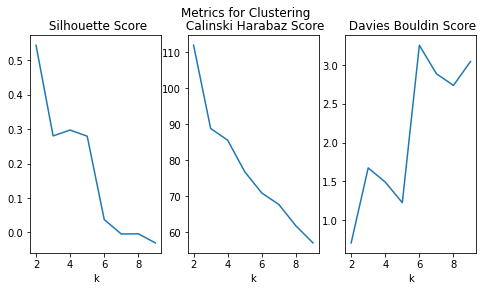

In [ ]:
draw_scores(scores)

In [ ]:
spec = SpectralClustering(n_clusters=4).fit(X_normalize)
labels = spec.labels_
score = InternalEvaluation(X_normalize, spec.labels_)

In [ ]:
score

{'_calinski_harabaz_score': 85.6522466524546,
 '_davies_bouldin_score': 1.5073915535380815,
 '_silhouette_score': 0.29444459163130793}

In [ ]:
spec = SpectralClustering(n_clusters=8).fit(X_normalize)
labels = spec.labels_
score = InternalEvaluation(X_normalize, spec.labels_)

In [ ]:
score

{'_calinski_harabaz_score': 61.82283750413565,
 '_davies_bouldin_score': 2.740618889284282,
 '_silhouette_score': -0.0039136309851786535}